In [1]:
#SETUP always run this
import math
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = "finviz.csv"

def get_column_from_csv(file, col_name):
    try:
        df = pd.read_csv(file)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df[col_name]


tickers = get_column_from_csv(path, "Ticker")
tickers = tickers.tolist()
print(len(tickers))



3157


In [ ]:
#Optional - RUN THIS ONCE A DAY TO GET THE LATEST DATA. Takes a while to run.
def getAllData(tickers):
    anchorData = yf.download(tickers)
    anchorData.head()
    closingPrices = anchorData["Close"]
    closingPrices.to_csv("AllClosingPricesToday.csv")
    closingPrices = pd.read_csv("AllClosingPricesToday.csv")
    return closingPrices

def getSearchRange(start, end):
    return closingPrices[closingPrices['Date'].between(start, end)]

closingPrices = getAllData(tickers)


In [2]:
# Read in closing prices from saved CSV file if needed
closingPrices = pd.read_csv("latestClose.csv")
closingPrices.tail()

tickers = closingPrices.columns.to_list()[1::]
def getSearchRange(start, end):
    return closingPrices[closingPrices['Date'].between(start, end)]


In [3]:

closingPrices.tail()

,Date,A,AA,AAL,AAN,AAON,AAP,AAPL,AAT,AAWW,...,ZNH,ZNTL,ZS,ZTO,ZTS,ZUMZ,ZUO,ZWS,ZYME,ZYXI
793,2023-02-27 00:00:00-05:00,142.179993,48.040001,15.630000,14.28,81.489998,140.630005,147.919998,25.450001,101.360001,...,35.139999,18.750000,131.839996,24.200001,165.470001,23.200001,8.56,23.010000,8.38,12.83
794,2023-02-28 00:00:00-05:00,141.970001,48.939999,15.980000,14.35,90.959999,144.960007,147.410004,25.230000,100.809998,...,36.009998,18.930000,131.149994,24.059999,167.000000,23.260000,8.47,23.000000,8.22,12.92
795,2023-03-01 00:00:00-05:00,137.509995,51.650002,16.030001,14.40,90.570000,138.820007,145.309998,25.090000,100.650002,...,36.090000,18.870001,128.440002,24.299999,167.570007,23.209999,8.20,22.400000,8.01,12.85
796,2023-03-02 00:00:00-05:00,141.669998,53.689999,16.120001,12.37,91.360001,139.210007,145.910004,24.900000,100.339996,...,37.549999,19.160000,134.130005,24.230000,168.580002,23.400000,9.63,23.070000,8.00,12.61
797,2023-03-03 00:00:00-05:00,143.929993,55.520000,16.360001,12.78,93.919998,138.479996,151.029999,24.830000,99.820000,...,37.529999,19.500000,119.239998,24.719999,170.559998,23.549999,10.02,23.110001,8.01,12.69


In [ ]:
# Run this this cell if we want to look at stocks releative to a low point. No harm in running even if not used. 
def getMinPrice(tickers, start, end):
    validTickers = {}
    invalidTickers = []
    searchRange = getSearchRange(start, end)
    for ticker in tickers:
        
        if ticker not in searchRange:
            invalidTickers.append(ticker)
            continue
        lowest = min(searchRange[ticker])

        if math.isnan(lowest):
            invalidTickers.append(ticker)
        else:
            validTickers[ticker] = round(lowest, 2)


    todaysTickers = list(validTickers.keys())
    todaysTickers.sort()
    return validTickers, invalidTickers, todaysTickers


In [4]:
# Run this this cell if we want to look at stocks relative to a high point. No harm in running even if not used. 
def getMaxPrice(tickers, start, end):
    validTickers = {}
    invalidTickers = []
    searchRange = getSearchRange(start, end)
    for ticker in tickers:
        
        if ticker not in searchRange:
            invalidTickers.append(ticker)
            continue
       
        lowest = max(searchRange[ticker])
        if math.isnan(lowest):
            invalidTickers.append(ticker)
        else:
            validTickers[ticker] = round(lowest, 2)


    todaysTickers = list(validTickers.keys())
    todaysTickers.sort()
    return validTickers, invalidTickers, todaysTickers

In [21]:
#Search Range for Greater than - ONLY RUN OF OF THESE AT A TIME. The data gets overwritten.
validTickers, invalidTickers, todaysTickers = getMaxPrice(tickers, "2022-10-13 00:00:00-05:00", "2022-12-15 00:00:00-05:00")
print(len(todaysTickers))
print(invalidTickers, len(invalidTickers))


3357
['ACRV', 'AKO/A', 'AKO/B', 'ALL/PB', 'ATAT', 'BAM', 'BF/A', 'BF/B', 'BML/PL', 'BRK/A', 'BRK/B', 'C/PK', 'CDEV', 'CIG/C', 'CWEN/A', 'EBR/B', 'GEF/B', 'GEHC', 'GLOP/PA', 'GRP/U', 'HEI/A', 'LEN/B', 'LGF/A', 'LGF/B', 'MBC', 'MKC/V', 'MOG/A', 'MS/PA', 'NFGFF', 'PBR/A', 'PRME', 'RXO', 'WFC/PL'] 33


In [ ]:
#Search Range for Less than - ONLY RUN OF OF THESE AT A TIME. The data gets overwritten.
validTickers, invalidTickers, todaysTickers = getMaxPrice(tickers, "2022-05-01 00:00:00-05:00", "2022-07-15 00:00:00-05:00")
print(len(todaysTickers))
print(invalidTickers, len(invalidTickers))

In [22]:
# Just needs to be run once to ensure the cell is active. 
def counter(date):
    count = 0.0
    searchFor = []
    antiSearch = []
    total = len(todaysTickers)
    for ticker in todaysTickers:
        if math.isnan(date[ticker]):
            total -=1
        elif date[ticker] > validTickers[ticker]:
            count += 1
            searchFor.append(ticker)
        else:
            antiSearch.append(ticker)

    percent = round(count/total, 4)
    return [percent, searchFor]

In [23]:
# date range to create graph on
targetRange = getSearchRange("2022-12-16 00:00:00-05:00", "2023-03-03 00:00:00-05:00")

# Number of days in the target range
print(targetRange.shape[0])

targetRange.tail()

52


,Date,A,AA,AAL,AAN,AAON,AAP,AAPL,AAT,AAWW,...,ZNH,ZNTL,ZS,ZTO,ZTS,ZUMZ,ZUO,ZWS,ZYME,ZYXI
793,2023-02-27 00:00:00-05:00,142.179993,48.040001,15.630000,14.28,81.489998,140.630005,147.919998,25.450001,101.360001,...,35.139999,18.750000,131.839996,24.200001,165.470001,23.200001,8.56,23.010000,8.38,12.83
794,2023-02-28 00:00:00-05:00,141.970001,48.939999,15.980000,14.35,90.959999,144.960007,147.410004,25.230000,100.809998,...,36.009998,18.930000,131.149994,24.059999,167.000000,23.260000,8.47,23.000000,8.22,12.92
795,2023-03-01 00:00:00-05:00,137.509995,51.650002,16.030001,14.40,90.570000,138.820007,145.309998,25.090000,100.650002,...,36.090000,18.870001,128.440002,24.299999,167.570007,23.209999,8.20,22.400000,8.01,12.85
796,2023-03-02 00:00:00-05:00,141.669998,53.689999,16.120001,12.37,91.360001,139.210007,145.910004,24.900000,100.339996,...,37.549999,19.160000,134.130005,24.230000,168.580002,23.400000,9.63,23.070000,8.00,12.61
797,2023-03-03 00:00:00-05:00,143.929993,55.520000,16.360001,12.78,93.919998,138.479996,151.029999,24.830000,99.820000,...,37.529999,19.500000,119.239998,24.719999,170.559998,23.549999,10.02,23.110001,8.01,12.69


[0.0197, 0.0128, 0.0253, 0.0509, 0.0459, 0.0581, 0.0718, 0.0459, 0.0754, 0.0748, 0.076, 0.1257, 0.1132, 0.1784, 0.1772, 0.2118, 0.2595, 0.2955, 0.3116, 0.308, 0.2684, 0.2464, 0.3038, 0.3447, 0.3393, 0.3488, 0.381, 0.395, 0.347, 0.4194, 0.4674, 0.5168, 0.4906, 0.4513, 0.4713, 0.4379, 0.3908, 0.3917, 0.4334, 0.426, 0.4468, 0.423, 0.4254, 0.3378, 0.3461, 0.3604, 0.3352, 0.3438, 0.3432, 0.3461, 0.355, 0.3864] 52


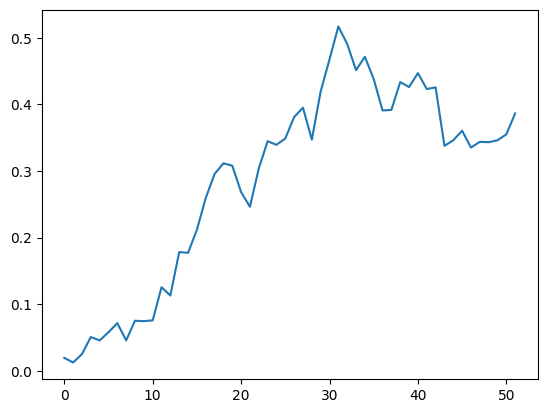

In [24]:
percents = []
for i in range(targetRange.shape[0]):
    percents.append(counter(targetRange.iloc[i])[0])
print(percents, len(percents))

#plot 
ys = percents
xs = range(len(ys))
plt.plot(xs, ys)
plt.show()
plt.close()